# Gjennomsnittlig fart, momentan fart og numerisk derivasjon i Python

<img src="bilder/athletes-running-on-track-and-field-oval-in-grayscale-34514.jpg" width="600px">

# Del 1: Gjennomsnittsfart er strekningen jeg løpte delt på tiden det tok


<img src="bilder/fart_illustrasjon.png">

## Hvis vi har startposisjon og sluttposisjon i tillegg til starttid og sluttid kan vi regne ut gjennomsnittsfarten

In [5]:
# Kode for gjennomsnittfart her

# Hvis vi vil vite hvordan farten endrer seg underveis trenger vi flere målepunkter

Men hva om vi ikke nøyer oss med gjennomsnittfarten. Hva om vi vil vite hva farten min er underveis i løpeturen? Hva gjør vi da?

Da må vi rett og slett ta flere mål. La oss si at jeg løper i **tyve sekunder** og noen står med stoppeklokke og måler hvor langt jeg har løpt for **hvert sekund**. For å lage måletidspunktene i Python kan i bruke arange i pylab 

In [2]:
# Kode for å lage array med måletidspunkter

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


### Oppgave 1 a) Tolke kode
Se på koden i cella over og svar på følgende spørsmål:
* Hva gjør hver linje?
* Hva slags effekt har tallene 0, 21 og 1 på koden? Hva vil skje dersom du endrer dem?

Vi trenger også avstanden min på de ulike tidspunktene. La oss si at avstanden jeg har løpt er gitt ved funksjonen
$$ f(t) =\frac{10}{1 + e^{10 - t}}. $$

### Oppgave 1 b) Funksjon for avstand
Lag en funksjon `f(t)` som tar inn et tidspunkt og returnerer avstand gitt av uttrykket over (hint for å regne ut $e^x$ kan du bruke `exp(x)` funksjonen fra pylab.

In [3]:
# Fyll inn funksjonen her

### Oppgave 1c) Finne avstandene på måletidspunktene 
Bruk funksjonen over til å finne måletidspunktene 

In [ ]:
# Fyll inn koden
måledistanser = ...
print(måledistanser)

Nå kan vi plotte løpeturen min med plot funksjonen

### Oppgave 1d) Plotte strekningsmålinene mot tidsmålingene

Fyll inn cella under slik at den bruker `plot` til å tegne et plot av strekningsmålingene mot tidsmålingene

In [ ]:
# Din kode her

title('Løpetur')
xlabel('Tid')
ylabel('Distanse')
show()

### Oppgave 1e) Refleksjonsoppgave
Når løpte jeg raskest? Etter 0 sekunder, etter 10 sekunder eller etter 15?

# Del 2: Hva er farten min underveis i turen?
<img src="bilder/stoppeklokker.png" width="600px">

In [6]:
# Kode for å utforske momentanfart her

<center>
    <img src="bilder/pexels-photo-3425443.jpeg" width="200px" style="display: inline" />
    <img src="bilder/athletes-running-on-track-and-field-oval-in-grayscale-34514.jpg" width="400px" style="display: inline">
</center>

# Vi kan regne ut en verdi for farten for hvert tidspunkt

In [3]:
# Kode for å lage plot av farten for hvert tidspunkt her

Dette stemmer fint med intuisjonen vår fra istad. Til å begynne med er farten lav, så øker den før den går ned til 0 igjen. La oss endre `dt` variabelen og se hva effekten av å endre den er.

## Oppgave 2
Modifiser cellen over til å lage en slider for `dt`. 
Uforsk hva som skjer med plottet når du enderer størrelsen på `dt` til å være større og mindre enn `1`. 

## Vi kan lage en funksjon som tar inn en array av avstandsmålinger og hvort stort tidsinterval som er mellom dem og spytter ut den tilhørende farten

In [4]:
def deriver(avstandsmålinger, dt):
    # Ta inn array av avstandsmålinger og dt
    # returner tilhørende fart
    
    antall_målinger = len(avstandsmålinger)
    fart = zeros(antall_målinger-1)
    
    for t in range(antall_målinger-1):
        fart[t] = (avstandsmålinger[t+1] - avstandsmålinger[t])/dt
        
    return fart

# Del 2.5: Derivere vanskelige funksjoner

Nå kan vi bruke funksjonen til å derivere hvilken som helst funksjon, så lenge vi har en array med målinger. cellen under lager først et plot av $g(x) = cos(x) + x$ for $x = 0 - 10$. Så deriverer vi den og plotter den deriverte under i et eget plot

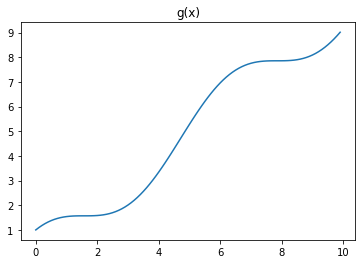

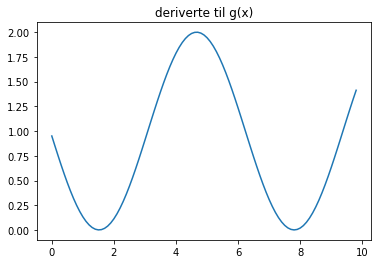

In [11]:
from pylab import *

# Definere funksjonen som skal deriveres
def g(x):
    return cos(x)+x 

# Definere størrelsen på tidsintervallet (dt)
dt = 0.1

# Lage arrayer med 'måletidspunkt' og 'målinger'
x_verdier = arange(0, 10, dt)
y_verdier = g(x_verdier)

# Tegne plot av funksjonen
plot(x_verdier, y_verdier)
title('g(x)')
show()

# Bruke numerisk derivasjon til å derivere funksjonen
fart_verdier = deriver(y_verdier, dt)

# Tegne plot av den deriverte
plot(x_verdier[:-1], fart_verdier)
title('deriverte til g(x)')
show()

### Oppgave 3a)
Endre cellen under til å i stedet derivere funksjonen 

$$ g(x) = (sin(x) + 1)^x $$

### Oppgave 3b)
Endre Ender cellen over slik at du deriverer sigmoiden

$$ f(t) =\frac{10}{1 + e^{10 - t}}. $$

to ganger. Du skal altså produsere 3 plot. et av $f(t)$ for $t = 0-20$. ett for den deriverte av $f(t)$, $f'(t)$, for $t=1-20$ og et for den dobbelt deriverte av $f(t)$ ,$f''(t)$, for  $t = 1-20$
Hva slags fysisk tolkning har den dobbeltderiverte for løpeturen min?

# Del 3: Med numerisk derivasjon kan vi derivere hvilken som helst matematisk funksjon

# Med numerisk derivasjon kan vi derivere ekte data

In [5]:
# Her installerer vi distanse_finner pakken som lar oss regne ut hvor langt vi har
# bevegd oss fra GPS data.
!pip install distanse_finner --user

In [ ]:
from distanse_finner import last_uniform_data

In [6]:
# Kode for å laste inn avstandsdata

In [7]:
# Kode for å plotte den deriverte avstandsdataen